## CREDIT CARD FRAUD DETECTION 

#### Credit card fraud is the act of using another person’s credit card to make purchases or request cash advances without the cardholder’s knowledge or consent.
#### Credit card fraud detection is the collective term for the policies, tools, methodologies, and practices that credit card companies and financial institutions take to combat identity fraud and stop fraudulent transactions.
#### In recent years, as the amount of data has exploded and the number of payment card transactions has skyrocketed, credit fraud detection has become largely digitized and automated. Most modern solutions leverage artificial intelligence (AI) and machine learning (ML) to manage data analysis, predictive modeling, decision-making, fraud alerts and remediation activity that occur when individual instances of credit card fraud are detected.

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read Dataset

In [6]:
df = pd.read_csv('creditcard.csv')

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.shape   # Rows - 283726 , columns = 31

(284807, 31)

In [9]:
df.info()    # exploring rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
x = df.iloc[:,1:30].values   # assigned the values of columns 1 to 29 in x 
y = df.iloc[:,30].values     # assigned the values of column 30 to y

In [11]:
print('Input Range:',x.shape)
print('Output Range:',y.shape)

Input Range: (284807, 29)
Output Range: (284807,)


In [12]:
df1 = df.copy()     # creating copy 

In [13]:
df.duplicated().sum()   # checking duplicates

1081

In [15]:
df.drop_duplicates(inplace=True)   # droping the duplicates

In [16]:
df.isnull().sum()   # checking null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
df.Class.value_counts()   # checking the value count of class

0    283253
1       473
Name: Class, dtype: int64

#### Inference

#### 1. It is highly imbalanced data

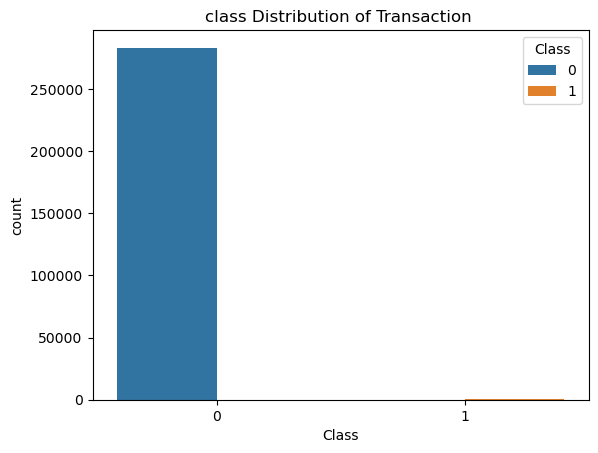

In [18]:
sns.countplot(x=df['Class'],hue=df['Class'])
plt.title('class Distribution of Transaction ')   
plt.show()

In [ ]:
# normal transaction - 0
# fraudulent transaction - 1

## Seprate data for analysis

In [19]:
legit_transaction = df[df.Class==0]
fraud_transaction = df[df.Class==1]

### Calculating the mean of imbalanced data

In [20]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


## Performing undersampling

In [21]:
legit_transaction_sample = legit_transaction.sample(n=473)
legit_transaction_sample.shape

(473, 31)

In [22]:
fraud_transaction.shape

(473, 31)

In [23]:
df = pd.concat([legit_transaction_sample,fraud_transaction],axis=0)    # concat 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
246931,153394.0,2.053814,-1.323251,-2.058206,-2.559677,-0.867993,-2.019607,0.108376,-0.572941,0.920651,...,-0.186190,-0.070362,-0.033202,0.025518,0.287002,-0.710318,0.009223,-0.040883,115.98,0
145300,86816.0,-1.754786,-2.226016,0.913746,1.667090,2.319108,-0.840953,-1.281843,0.205377,-1.708174,...,-0.498802,-1.833823,0.831377,-0.052256,-0.489091,-0.720456,0.119976,0.234729,103.00,0
31243,36279.0,-0.983751,0.648636,1.588299,-0.194134,0.716205,-0.056853,0.697691,0.281168,-0.656690,...,0.144012,0.169677,-0.330624,-0.359589,0.595897,-0.378407,0.015178,0.046171,25.50,0
5656,5901.0,1.132064,-0.386579,1.152047,0.200751,-0.961795,0.114594,-0.842514,0.118153,2.125933,...,-0.216627,-0.295576,-0.013288,0.028932,0.092724,0.950486,-0.071399,0.002818,44.22,0
256163,157564.0,-1.522650,1.405254,1.147360,-0.447349,-0.285390,-0.144794,0.156589,0.256353,0.297593,...,-0.023770,-0.092355,0.041537,1.084859,-0.386140,-0.703929,-1.083772,-0.414726,9.99,0


In [24]:
df.Class.value_counts()     # value count after undersampling

0    473
1    473
Name: Class, dtype: int64

### Checking mean for both the transaction after undersampling process

In [25]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94833.287526,0.038149,0.013788,0.062673,-0.000542,-0.045444,-0.072698,0.068234,0.042134,-0.015735,...,-0.017237,-0.014409,-0.025307,-0.000072,0.077186,0.017360,-0.014747,0.009263,-0.006923,90.623277
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [26]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
246931,153394.0,2.053814,-1.323251,-2.058206,-2.559677,-0.867993,-2.019607,0.108376,-0.572941,0.920651,...,-0.186190,-0.070362,-0.033202,0.025518,0.287002,-0.710318,0.009223,-0.040883,115.98,0
145300,86816.0,-1.754786,-2.226016,0.913746,1.667090,2.319108,-0.840953,-1.281843,0.205377,-1.708174,...,-0.498802,-1.833823,0.831377,-0.052256,-0.489091,-0.720456,0.119976,0.234729,103.00,0
31243,36279.0,-0.983751,0.648636,1.588299,-0.194134,0.716205,-0.056853,0.697691,0.281168,-0.656690,...,0.144012,0.169677,-0.330624,-0.359589,0.595897,-0.378407,0.015178,0.046171,25.50,0
5656,5901.0,1.132064,-0.386579,1.152047,0.200751,-0.961795,0.114594,-0.842514,0.118153,2.125933,...,-0.216627,-0.295576,-0.013288,0.028932,0.092724,0.950486,-0.071399,0.002818,44.22,0
256163,157564.0,-1.522650,1.405254,1.147360,-0.447349,-0.285390,-0.144794,0.156589,0.256353,0.297593,...,-0.023770,-0.092355,0.041537,1.084859,-0.386140,-0.703929,-1.083772,-0.414726,9.99,0


### Spliting Data into X and Y

In [27]:
x = df.drop('Class',axis=1)
y = df['Class']

In [28]:
x.shape

(946, 30)

In [29]:
y.shape

(946,)

## Spliting data into Test and Train data

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(662, 30)
(284, 30)
(662,)
(284,)


## Model Building

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
from  sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

In [34]:
def gen_and_eval_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    print('Train acc',model.score(x_train,y_train))
    print('Test acc',model.score(x_test,y_test))
    ypred = model.predict(x_test)
    cm = confusion_matrix(y_test,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,ypred))    

In [35]:
lr = LogisticRegression(max_iter=10000)
gen_and_eval_model(lr,x_train,x_test,y_train,y_test)

Train acc 0.9229607250755287
Test acc 0.9330985915492958
Confusion Matrix
 [[133   7]
 [ 12 132]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       140
           1       0.95      0.92      0.93       144

    accuracy                           0.93       284
   macro avg       0.93      0.93      0.93       284
weighted avg       0.93      0.93      0.93       284



## Evaluating the model

In [36]:
lr1 = LogisticRegression(max_iter=10000)
lr1.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [37]:
print('Train Scr',lr1.score(x_train,y_train))
print('Test Scr',lr1.score(x_test,y_test))

Train Scr 0.9229607250755287
Test Scr 0.9330985915492958


In [38]:
ypred_lr1 = lr1.predict(x_test)
print(ypred_lr1)

[0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0
 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0
 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1
 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1
 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1
 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1
 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1]


In [39]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [40]:
acc_lr1 = accuracy_score(y_test,ypred_lr1)
pre_lr1 = precision_score(y_test,ypred_lr1)
rec_lr1 = recall_score(y_test,ypred_lr1)

lr1_res = pd.DataFrame({'Model':'LogReg_m1','Acc':acc_lr1,
                   'Precision':pre_lr1,'Recall':rec_lr1},index=[0])
lr1_res

,Model,Acc,Precision,Recall
0,LogReg_m1,0.933099,0.94964,0.916667


## ROC_AUC

In [41]:
from sklearn.metrics import roc_curve,roc_auc_score

In [42]:
ypred_lr1_prob = lr1.predict_proba(x_test)
print(ypred_lr1_prob[:10])

[[9.14595792e-01 8.54042081e-02]
 [8.34294263e-01 1.65705737e-01]
 [4.34828248e-01 5.65171752e-01]
 [9.71995393e-01 2.80046072e-02]
 [7.12223647e-01 2.87776353e-01]
 [0.00000000e+00 1.00000000e+00]
 [6.11671158e-10 9.99999999e-01]
 [6.97692947e-01 3.02307053e-01]
 [8.43773701e-01 1.56226299e-01]
 [0.00000000e+00 1.00000000e+00]]


In [43]:
print(ypred_lr1[:10])

[0 0 1 0 0 1 1 0 0 1]


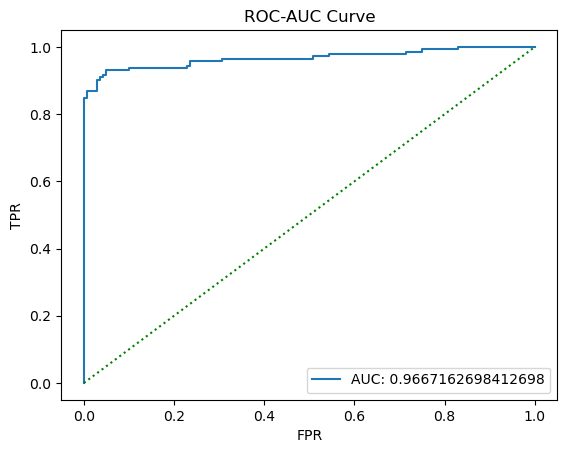

In [44]:
fpr,tpr,thresh = roc_curve(y_test,ypred_lr1_prob[:,1])
auc_score = roc_auc_score(y_test,ypred_lr1_prob[:,1])
plt.plot(fpr,tpr,label='AUC: '+str(auc_score))
plt.plot([0,1],[0,1],color='green',linestyle='dotted')
plt.title('ROC-AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

### Best Threshold

In [45]:
best_thresh1 = thresh[np.argmax(tpr*(1-fpr))]
print(best_thresh1)

0.4688854163174137


In [46]:
best_thresh2 = thresh[np.argmax(abs(tpr-fpr))]
print(best_thresh2)

0.4688854163174137


In [47]:
ypred_lr2 = np.where(ypred_lr1_prob[:,1]>best_thresh2,1,0)
print(ypred_lr2)

[0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0
 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0
 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1
 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1
 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1
 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1
 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1]


In [48]:
acc_lr2 = accuracy_score(y_test,ypred_lr2)
pre_lr2 = precision_score(y_test,ypred_lr2)
rec_lr2 = recall_score(y_test,ypred_lr2)

lr2_res = pd.DataFrame({'Model':'LogReg_m2(Thresh=0.488)','Acc':acc_lr2,
                   'Precision':pre_lr2,'Recall':rec_lr2},index=[1])
lr2_res

,Model,Acc,Precision,Recall
1,LogReg_m2(Thresh=0.488),0.93662,0.95,0.923611


In [49]:
res = pd.concat([lr1_res,lr2_res])
res

,Model,Acc,Precision,Recall
0,LogReg_m1,0.933099,0.94964,0.916667
1,LogReg_m2(Thresh=0.488),0.936620,0.95000,0.923611


#### According to the result logReg_m2 is better than LogReg_m1

#### So this is how Python Programming language can be used to detect the fraud transactions taking place through credit card.